<a href="https://colab.research.google.com/github/karthajee/lenet/blob/master/Stat_Ch13_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#IMPORTS FOR DATASET
from sklearn import datasets

#IMPORTS FOR KERAS
#Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

#Optimizers
from tensorflow.keras.optimizers import SGD

#Other
import tensorflow.keras.backend as K

#IMPORTS FOR CONVENIENCE FUNCTIONS
from sklearn.model_selection import train_test_split

#IMPORTS FOR EVALUATION
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#IMPORTS - OTHER
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#Download the MNIST dataset
dataset = datasets.fetch_openml('mnist_784')

In [ ]:
data = dataset.data
targets = dataset.target

#Convert uint8 to floats between 0-1
data = data.astype('float') / 255.0
targets = targets.astype('int')

#Reshape the data as per "channels-..."" ordering
if K.image_data_format() == "channels-first":
  data = data.reshape(data.shape[0], 1, 28, 28)
else:
  data = data.reshape(data.shape[0], 28, 28, 1)


#Split dataset into train and test sets
(trainX, testX, trainY, testY) = train_test_split(data, targets, test_size=0.25, random_state=42)


#Convert the target labels into one-hot encoding vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
#Initialize a Keras sequential model
model = Sequential()

#Obtain the input shape
input_shape = (data.shape[1], data.shape[2], data.shape[3])

#Add LeNet layers sequentially
print("[INFO] Building the model...")
model.add(Conv2D(filters=20, kernel_size=(5,5), padding='same', strides=(1,1), input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=50, kernel_size=(5,5), padding='same',strides=(1,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

#Print the LeNet model summary
print("[INFO] Summarizing the model...")
model.summary()

[INFO] Building the model...
[INFO] Summarizing the model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_____________________________________________________________

In [ ]:
#Initialize the optimizer
sgd = SGD(lr=0.01)

#Compile the model
print("[INFO] Compiling the model...")
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Fit the model to input data
print("[INFO] Training the network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, 
              batch_size=64, verbose =1)

[INFO] Compiling the model...
[INFO] Training the network...
Epoch 1/20
821/821 [==============================] - 4s 4ms/step - loss: 0.6682 - accuracy: 0.8172 - val_loss: 0.2659 - val_accuracy: 0.9189
Epoch 2/20
821/821 [==============================] - 3s 4ms/step - loss: 0.1704 - accuracy: 0.9494 - val_loss: 0.1631 - val_accuracy: 0.9506
Epoch 3/20
821/821 [==============================] - 3s 4ms/step - loss: 0.1157 - accuracy: 0.9660 - val_loss: 0.1830 - val_accuracy: 0.9414
Epoch 4/20
821/821 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.9731 - val_loss: 0.0934 - val_accuracy: 0.9718
Epoch 5/20
821/821 [==============================] - 3s 4ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.1092 - val_accuracy: 0.9669
Epoch 6/20
821/821 [==============================] - 3s 4ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0722 - val_accuracy: 0.9779
Epoch 7/20
821/821 [==============================] - 3s 4ms/step - loss: 0.0582 - accu

In [ ]:
#Make predictions on the test data
print("[INFO] Evaluating the network...")
predictions = model.predict(testX, batch_size=64)


print(classification_report(y_true=np.argmax(testY, axis=1), y_pred=np.argmax(predictions, axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

[INFO] Evaluating the network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1714
           1       1.00      0.99      0.99      1977
           2       0.98      0.99      0.99      1761
           3       0.98      0.99      0.98      1806
           4       0.98      0.99      0.99      1587
           5       0.98      0.99      0.99      1607
           6       1.00      0.99      0.99      1761
           7       0.99      0.98      0.99      1878
           8       0.96      0.99      0.97      1657
           9       0.98      0.97      0.98      1752

    accuracy                           0.99     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       0.99      0.99      0.99     17500



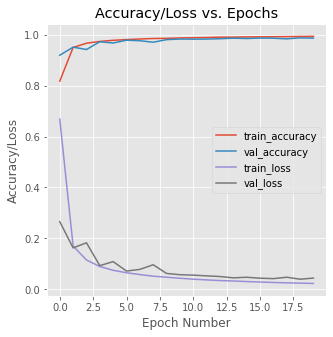

In [ ]:
#Print the training and validation loss + accuracy
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Accuracy/Loss vs. Epochs")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch Number")
plt.show()